In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob

In [25]:
file1 = pd.read_csv('observations.csv')
file2 = pd.read_csv('species_info.csv')
file1_2 = glob.glob('*.csv')
files = [pd.read_csv(filename) for filename in file1_2]
file3 = pd.concat(files)

In [26]:
file1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [27]:
file1.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [28]:
print(f'''There are {file1.park_name.nunique()} unique area under examination and these are as follows:
{file1.park_name.unique()}''')

There are 4 unique area under examination and these are as follows:
['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


In [29]:
file1.park_name.replace('Great Smoky Mountains National Park', 'Great Smoky', inplace=True)
file1.park_name.replace('Yosemite National Park', 'Yosemite', inplace=True)
file1.park_name.replace('Bryce National Park', 'Bryce', inplace=True)
file1.park_name.replace('Yellowstone National Park', 'Yellowstone', inplace=True)

In [30]:
file1[file1.park_name == 'Great Smoky']['observations'].mean()

74.14491758241758

In [11]:
avg_bioticrs = file1[['park_name', 'observations']].groupby('park_name').mean().reset_index()

In [12]:
avg_bioticrs

,park_name,observations
0,Bryce,98.905391
1,Great Smoky,74.144918
2,Yellowstone,247.864354
3,Yosemite,148.236951


In [13]:
total_bioticrs = file1[['park_name', 'observations']].groupby('park_name').sum().reset_index()

In [14]:
total_bioticrs

,park_name,observations
0,Bryce,576025
1,Great Smoky,431820
2,Yellowstone,1443562
3,Yosemite,863332


In [15]:
total_bioticrs['proportions'] = np.round(total_bioticrs.observations*100 / total_bioticrs.observations.sum(), 2)

In [16]:
total_bioticrs

,park_name,observations,proportions
0,Bryce,576025,17.38
1,Great Smoky,431820,13.03
2,Yellowstone,1443562,43.55
3,Yosemite,863332,26.05


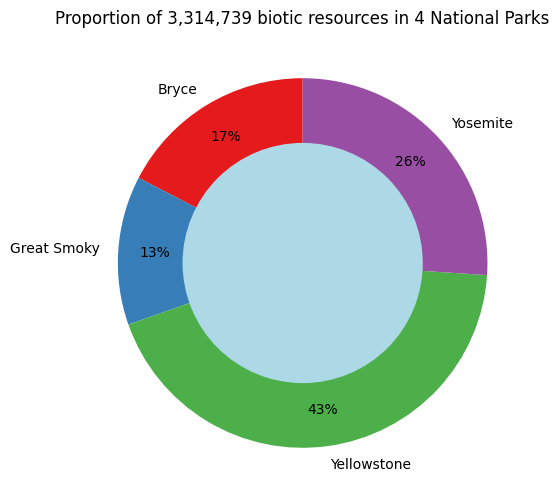

<Figure size 640x480 with 0 Axes>

In [17]:
plt.figure(figsize=[12, 6])
sns.set_palette('Set1')
plt.pie(total_bioticrs['observations'], autopct='%d%%', startangle=90, labels=total_bioticrs.park_name, pctdistance=0.8)
plt.title(f'Proportion of {total_bioticrs.observations.sum():,} biotic resources in {len(total_bioticrs.park_name)} National Parks')
hole = plt.Circle((0, 0), 0.65, facecolor='lightblue')
plt.gcf().gca().add_artist(hole)
plt.savefig('donut_bioticrs_parks.png')
plt.show()
plt.clf()

In [18]:
print('''Result: You can see above in the donut chart that more than 2 thirds of the biotic resources living in Yellowstone and Yosemite National Parks
while only '30%' live in the other two Parks. Morover almost half of the total population in the examination is from Yellowstone.''')

Result: You can see above in the donut chart that more than 2 thirds of the biotic resources living in Yellowstone and Yosemite National Parks
while only '30%' live in the other two Parks. Morover almost half of the total population in the examination is from Yellowstone.


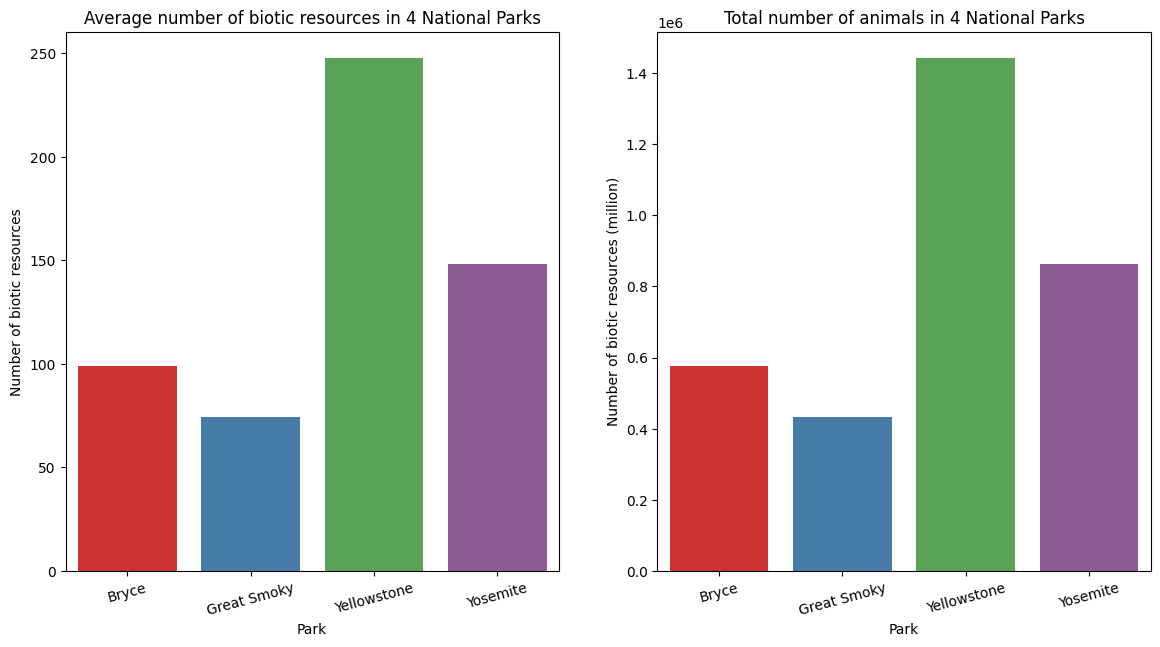

<Figure size 640x480 with 0 Axes>

In [19]:
plt.figure(figsize=[14, 7])
plt.subplot(1,2,1)
sns.barplot(x='park_name', y='observations', data=avg_bioticrs)
plt.title(f'Average number of biotic resources in {avg_bioticrs.park_name.nunique()} National Parks')
plt.xlabel('Park')
plt.ylabel('Number of biotic resources')
plt.xticks(rotation=15)
plt.subplot(1,2,2)
sns.barplot(x='park_name', y='observations', data=total_bioticrs)
plt.title(f'Total number of animals in {total_bioticrs.park_name.nunique()} National Parks')
plt.xlabel('Park')
plt.ylabel('Number of biotic resources (million)')
plt.xticks(rotation=15)
plt.savefig('bars_bioticrs_parks.png')
plt.show()
plt.clf()

In [20]:
print('''Result: You can see that the lowest average biotics number relates to Great Smokey and the highest belongs to Yellowstone.
It seems that the research focused on Yellowstone and Yosemite, but at this time we cannot be sure, because an observation can 
include 0 and 500 biotic resources for example and we do not know anything about the numbers of the observations successively.''')

Result: You can see that the lowest average biotics number relates to Great Smokey and the highest belongs to Yellowstone.
It seems that the research focused on Yellowstone and Yosemite, but at this time we cannot be sure, because an observation can 
include 0 and 500 biotic resources for example and we do not know anything about the numbers of the observations successively.


In [21]:
print(f'There are {len(file1.observations):,} observations including {file1.observations.sum():,} biotic resources in the sample')

There are 23,296 observations including 3,314,739 biotic resources in the sample


In [22]:
print(f'There are {file1.scientific_name.nunique()} species among the biotic resources')

There are 5541 species among the biotic resources


In [23]:
print(f'The max number of biotic resources in one observation is {file1.observations.max()}')
print(f'The min number of biotic resources in one observation is {file1.observations.min()}')
print(f'The average number of biotic resources in one observation is {int(file1.observations.mean())}')

The max number of biotic resources in one observation is 321
The min number of biotic resources in one observation is 9
The average number of biotic resources in one observation is 142


In [ ]:
stats = ['min', 'max', 'mean', 'median']
agg = file1.observations.aggregate(stats)
for i in range(len(stats)):
    print(f'The {stats[i]} value in one observation is {int(agg[i])}')

In [ ]:
plt.figure(figsize=[9, 6])
sns.histplot(file1.observations, kde=True, bins=20, color='darkblue')
plt.title(f'Histogram of observations in {file1.park_name.nunique()} National Parks including {file1.observations.sum():,} biotic resources')
plt.xlabel('Number of biotic resources in one observation (ranges)')
plt.ylabel('Number of observations (count)')
plt.text(x=175, y=2800, s=f'''Biotic resources between [{file1.observations.min()} - {file1.observations.max()}] per observation''',
fontsize=9)
plt.axvline(np.mean(file1.observations), color='black')
plt.text(x=145, y=2000, s=f'Mean: {int(file1.observations.mean())}', fontsize=8)
plt.savefig('hist_observs.png')
plt.show()
plt.clf()

In [ ]:
print('''Result: You can see that there are 2 peaks in this distribution, meaning that the highest number of observations
have 2 occurences at around 85 and 250 biotic resources. Let us examine where are those observations!''')

In [ ]:
print('First we calculate the number of observations in the Parks successively.')

In [ ]:
park1 = file1[file1.park_name == 'Great Smoky']
park2 = file1[file1.park_name == 'Yosemite']
park3 = file1[file1.park_name == 'Bryce']
park4 = file1[file1.park_name == 'Yellowstone']

In [ ]:
park_all = [park1, park2, park3, park4]

In [ ]:
for park in park_all:
    print(f'The number of observations in {park.park_name.unique()[0]} Park is {len(park.observations)}')

In [ ]:
print('''Final result: The number of observations is exactly the same in every Park. It means that the majority of the 
observations below 85 biotic resources is related to the Great Smokey Park because of having the lowest average number
in one observation, and because of the existence of the other observations of other Parks.

On the other hand observations with more than 150 biotic resources mostly related to the Yellowstone because we calculated the highest mean of
among the 4 Parks in that case and there is a relative big difference between the average number of Yellostone and Yosemite.
It was worth doing some math, and we can also find the min and the max numbers of every Park, but that is not a must.''')

In [ ]:
file2.info()

In [ ]:
file2.head()

In [ ]:
file2.nunique()

In [ ]:
file2.scientific_name.nunique() == file1.scientific_name.nunique()

In [ ]:
len(file2.scientific_name) - file2.scientific_name.nunique()

In [ ]:
file2.duplicated(subset='scientific_name').value_counts()

In [ ]:
file2.duplicated(subset='scientific_name').value_counts().iloc[1]

In [ ]:
file2 = file2.drop_duplicates(subset='scientific_name')

In [ ]:
file2.duplicated(subset='scientific_name').value_counts()

In [ ]:
file2.info()

In [ ]:
file2.conservation_status.unique()

In [ ]:
concerned_species = file2[~file2.conservation_status.isna()].reset_index()

In [ ]:
concerned_species

In [ ]:
concerned_species['category'].unique()

In [ ]:
concerned_species['conservation_status'].unique()

In [ ]:
print(f'The number of "concerned" species is {len(file2.scientific_name[~file2.conservation_status.isna()])}')

In [ ]:
print('Or {}, or {}'.format(concerned_species.scientific_name.nunique(), len(concerned_species.scientific_name)))

In [ ]:
newdf = pd.merge(file1, concerned_species, on='scientific_name', how='left')

In [ ]:
newdf.head()

In [ ]:
newdf.info()

In [ ]:
newdf_values = newdf[~newdf.index.isna() & ~newdf.category.isna() & ~newdf.common_names.isna() & ~newdf.conservation_status.isna()].reset_index()

In [ ]:
newdf_values.info()

In [ ]:
newdf_values = newdf_values.drop(['level_0', 'index'], axis=1)

In [ ]:
newdf_values.info()

In [ ]:
newdf_values.head()

In [ ]:
concerned_bioticrs = newdf_values[['park_name', 'observations']].groupby('park_name').sum().reset_index()

In [ ]:
plt.figure(figsize=[7, 7])
sns.barplot(x='park_name', y='observations', data=concerned_bioticrs)
plt.title(f'Proportion of "concerned" biotic resources in {concerned_bioticrs.park_name.nunique()} National Parks')
plt.xlabel('Park')
plt.ylabel('Number of biotic resources')
plt.xticks(rotation=15)
plt.savefig('bar_concern_bioticrs.png')
plt.show()
plt.clf()

In [ ]:
print('''Result: As expected in Yellowstone the proportion of "concerned" biotic resources is the highest.
This chart follows the previous chart, meaning the ratios are - we can say - the same.''')

In [ ]:
plt.figure(figsize=[12, 6])
plt.pie(concerned_bioticrs['observations'], autopct='%d%%', startangle=90, labels=concerned_bioticrs.park_name, pctdistance=0.8, explode=[0.035 for _ in range(len(concerned_bioticrs.park_name))])
plt.title(f'Proportion of {concerned_bioticrs.observations.sum():,} "concerned" biotic resources in {len(concerned_bioticrs.park_name)} National Parks')
hole = plt.Circle((0, 0), 0.65, facecolor='lightblue')
plt.gcf().gca().add_artist(hole)
plt.savefig('donut_concern_bioticrs.png')
plt.show()
plt.clf()

In [ ]:
a = np.round(100*concerned_bioticrs.observations.sum()/file1.observations.sum(),2)

In [ ]:
print(f'''Here you can see again the proportions of "concerned" biotic resources of every Park, and you can also find out that {a}% of the
total population in this sample are "concerned" somehow, which is a measurable number if we recall the total is more than 3 million.''')

In [ ]:
newdf_values.head()

In [ ]:
grouped_cat = newdf_values[['category', 'observations']].groupby('category').sum().reset_index()

In [ ]:
grouped_cat

In [ ]:
plt.figure(figsize=[7, 7])
sns.barplot(x='category', y='observations', data=grouped_cat)
plt.title('Species of "concerned" biotic resources')
plt.xlabel('Species')
plt.ylabel('Number of biotic resources')
plt.xticks(rotation=15)
plt.savefig('bar_concern_species.png')
plt.show()
plt.clf()

In [ ]:
grouped_conserv = newdf_values[['conservation_status', 'observations']].groupby('conservation_status').sum().reset_index()

In [ ]:
grouped_conserv

In [ ]:
plt.figure(figsize=[7,7])
sns.barplot(x='conservation_status', y='observations', data=grouped_conserv)
plt.title('Status of "concerned" biotic resources')
plt.xlabel('Status')
plt.ylabel('Number of biotic resources')
plt.xticks(rotation=15)
plt.savefig('bar_status_concerned.png')
plt.show()
plt.clf()

In [ ]:
grouped_more = newdf_values[['conservation_status', 'category', 'observations']].groupby(['conservation_status', 'category']).sum().reset_index()

In [ ]:
grouped_more